In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import utils

from utils import local_data
from utils import window

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df_series_vtec = pd.read_pickle(os.path.join(local_data, "station_data_series_tec.pkl.xz"), compression='xz')
df_series_s4 = pd.read_pickle(os.path.join(local_data, "df_series_s4.pkl.xz"), compression='xz')
df_station = pd.read_pickle(os.path.join(local_data, 'df_station_sort.pkl'))

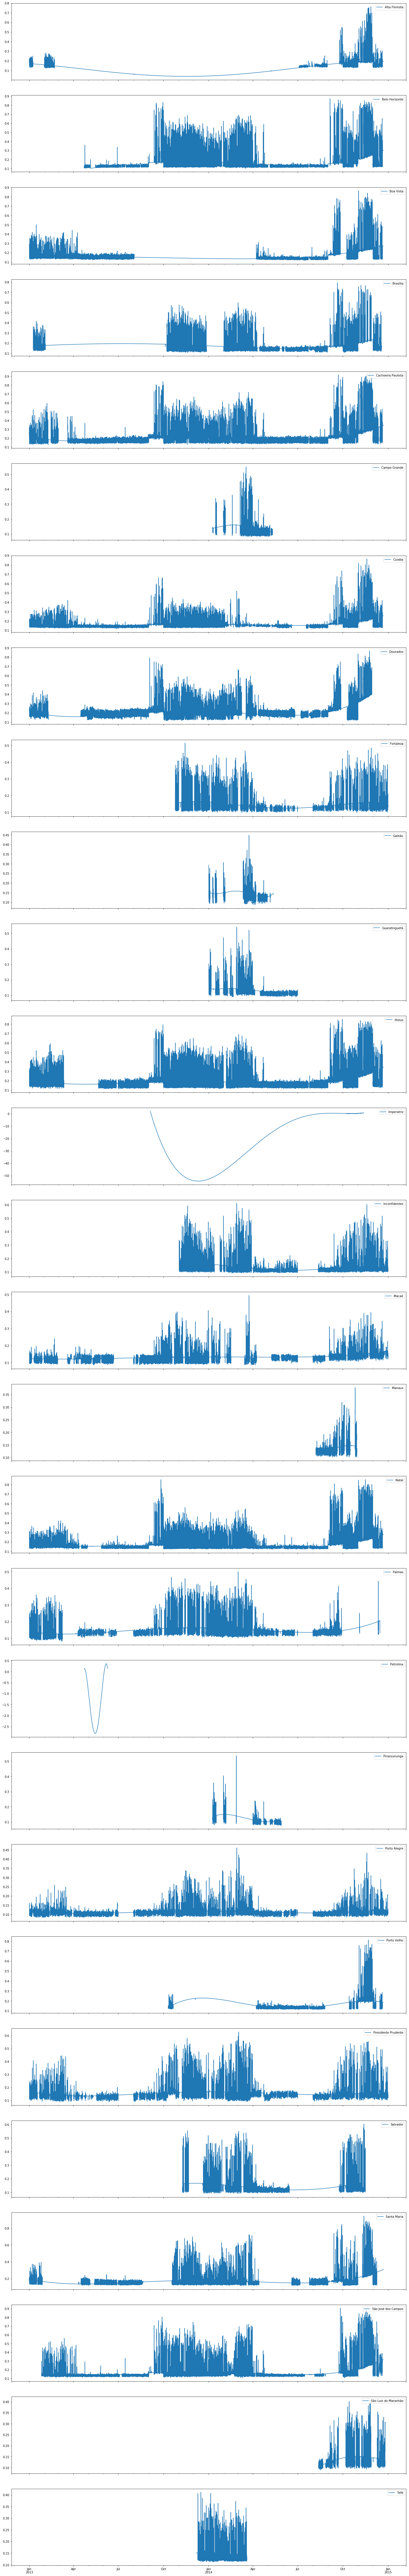

In [3]:
size = df_series_s4.columns.size
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(df_series_s4.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_s4[i].plot(figsize=(24, 160), ax=ax[idx], label=name)
    ax[idx].legend(loc="upper right")

Analisando os dados os gráficos acima, optou-se por descartar as estações de Petrolina e Imperatriz, cujos idenfiticadores são respectivamentes 'pln' e 'imp'.

In [4]:
remove = ['imp', 'pln']
for i in remove:
    df_station = df_station[df_station.identificationstation != i]
    del df_series_s4[i]
    del df_series_vtec[i]
    

In [5]:
df_station

,identificationstation,height,latitude,longitude,state,city
city_name_correct,,,,,,
Alta Floresta,afl,267.000,-9.870000,-55.900000,mt,alta floresta
Belo Horizonte,bhz,858.000,-19.868500,-47.869400,mg,belo horizonte
Boa Vista,bov,69.180,2.833920,-60.695380,rr,boa vista
Brasília,bsa,1050.000,-15.764200,-47.869400,df,brasilia
Cachoeira Paulista,cpa,580.000,-22.410000,-45.000000,sp,cachoeira paulista
Campo Grande,32,NaN,-20.497000,-54.615000,ms,campos grande
Cuiaba,cub,278.000,-15.555200,-56.069800,mt,cuiaba
Dourados,dou,756.120,-22.110000,-54.550000,ms,dourados
Fortaleza,24,NaN,-3.742000,-38.539000,ce,fortaleza


Os dados de S4 englobam dois anos inteiros, o período começando em janeiro de 2013 e terminando em janeiro de 2015. Os dados de vtec por sua vez, restrigem-se a um intervalo menor. Assim, é necessário realizar um corte na série de dados de S4, de forma a ter o mesmo número de analises.

In [6]:
first_date = df_series_vtec.index[0].to_pydatetime()
last_date = df_series_vtec.index[-1].to_pydatetime()
df_series_vtec.shape

(12960, 26)

In [7]:
df_series_s4 = df_series_s4.ix[first_date:last_date]
df_series_s4.shape

(12960, 26)

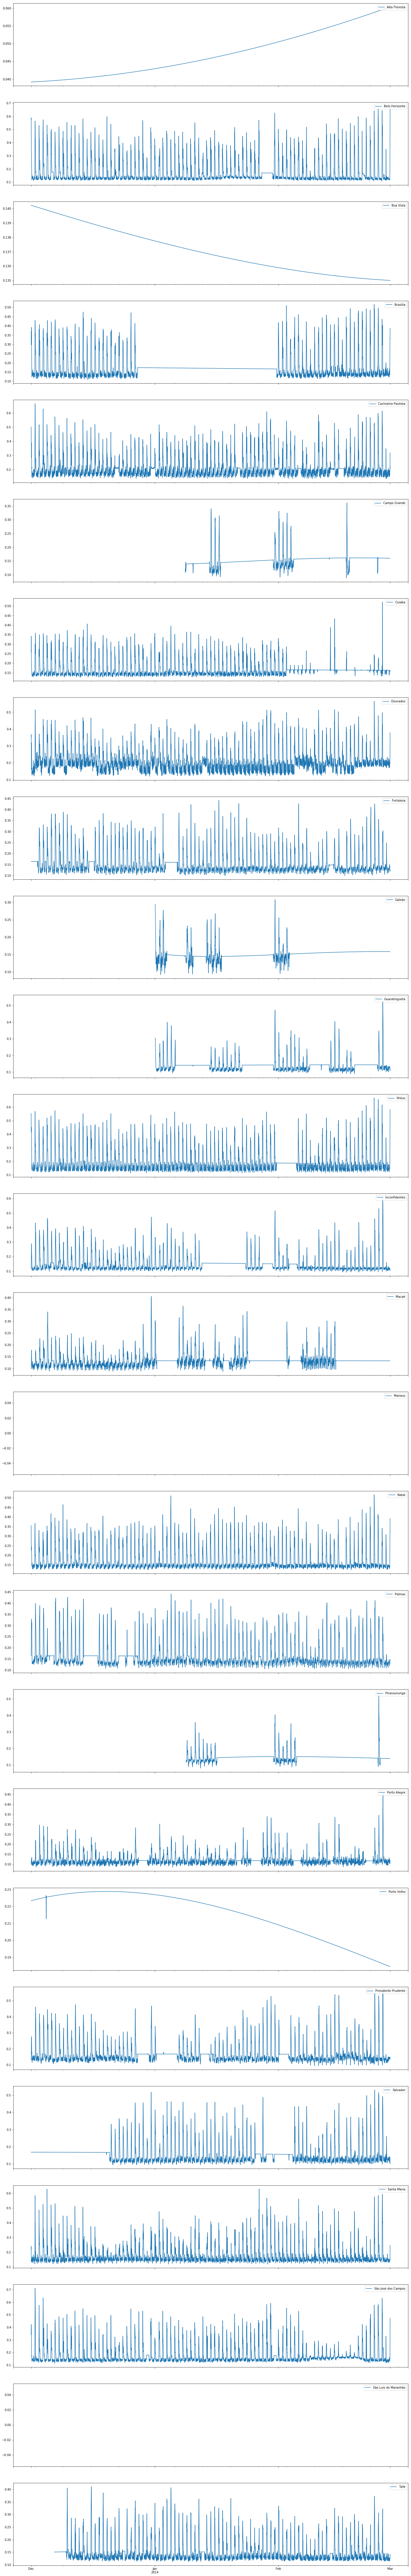

In [8]:
size = df_series_s4.columns.size
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(df_series_s4.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_s4[i].plot(figsize=(24, 160), ax=ax[idx], label=name)
    ax[idx].legend(loc="upper right")

In [9]:
remove = ['afl', 'bov', '28', 'pvh', '29']
for i in remove:
    df_station = df_station[df_station.identificationstation != i]
    del df_series_s4[i]
    del df_series_vtec[i]

In [10]:
df_series_vtec.to_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
df_series_s4.to_pickle(os.path.join(local_data, "df_series_s4_re.pkl.xz"), compression='xz')
df_station.to_pickle(os.path.join(local_data, 'df_station_sort_re.pkl'))